This code gives an introduction to unsupervised learning by solving a clustering problem using **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

Replace 'XLABEL' and 'YLABEL' with the respective labels in your data set.

# Problem description
Enter in the text cell below the clustering problem that you're about to work on. 

What is your X and Y label?

Import packages

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


Import and explore the data set

In [3]:
df = pd.read_csv('Billionaire.csv')
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36,Technology
...,...,...,...,...,...,...,...
2671,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49,Technology
2672,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65,Manufacturing
2673,Zhao Meiguang,$1 B,China,gold mining,2674,58,Metals & Mining
2674,Zhong Naixiong,$1 B,China,conglomerate,2674,58,Diversified


2. Display columns and describe the data set

In [4]:
df.describe()

,Rank,Age
count,2676.000000,2676.000000
mean,1343.791106,63.113602
std,773.724884,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


Scatter plot

Text(0, 0.5, 'Age')

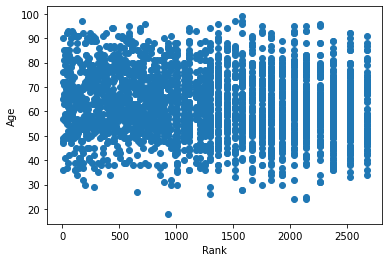

In [7]:
plt.scatter(df.Rank,df['Age'])
plt.xlabel('Rank')
plt.ylabel('Age')

Fit and predict three clusters for the data

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Rank','Age']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [9]:
df['cluster']=y_predicted
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,cluster
0,Jeff Bezos,$177 B,United States,Amazon,1,57,Technology,2
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49,Automotive,2
2,Bernard Arnault & family,$150 B,France,LVMH,3,72,Fashion & Retail,2
3,Bill Gates,$124 B,United States,Microsoft,4,65,Technology,2
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36,Technology,2


In [10]:
km.cluster_centers_

array([[1329.32969432,   63.33951965],
       [2234.92290503,   61.19106145],
       [ 437.06705202,   64.86358382]])

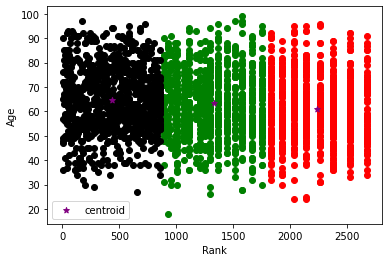

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Rank,df1['Age'],color='green')
plt.scatter(df2.Rank,df2['Age'],color='red')
plt.scatter(df3.Rank,df3['Age'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Rank')
plt.ylabel('Age')
plt.legend()

Fit the model using MinMaxScaler()

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Rank']])
df['Rank'] = scaler.transform(df[['Rank']])

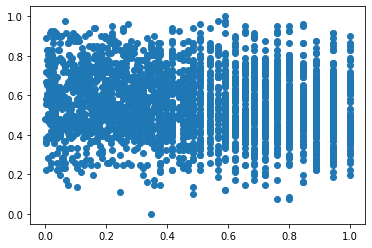

In [13]:
plt.scatter(df.Rank,df['Age'])

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Rank','Age']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [15]:
df['cluster']=y_predicted
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,cluster
0,Jeff Bezos,$177 B,United States,Amazon,0.000000,0.481481,Technology,1
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",0.000374,0.382716,Automotive,1
2,Bernard Arnault & family,$150 B,France,LVMH,0.000748,0.666667,Fashion & Retail,1
3,Bill Gates,$124 B,United States,Microsoft,0.001122,0.580247,Technology,1
4,Mark Zuckerberg,$97 B,United States,Facebook,0.001496,0.222222,Technology,1


In [16]:
km.cluster_centers_

array([[0.83626696, 0.52649466],
       [0.16858126, 0.58600454],
       [0.50295983, 0.55830364]])

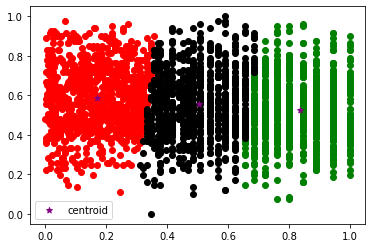

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Rank,df1['Age'],color='green')
plt.scatter(df2.Rank,df2['Age'],color='red')
plt.scatter(df3.Rank,df3['Age'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Rank','Age']])
    sse.append(km.inertia_)

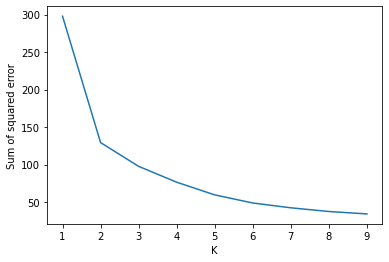

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)